# UTKFace Efficientnet Training with Distance Weight

In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, EfficientB7Model, ResNet50Model, VGG16Model
from distancetraining import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない

In [18]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

model_name = "efficientnet"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/efficientnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

In [19]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (200, 200)


Validation Accuracy: 0.4954 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5340
Validation Accuracy: 0.4954 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5630
Validation Accuracy: 0.4954 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6022
Validation Accuracy: 0.4954 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6404
Validation Accuracy: 0.4954 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6697
Validation Accuracy: 0.4954 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.7029
Validation Accuracy: 0.4954 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.7321
Validation Accuracy: 0.4954 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.7570
Validation Accuracy: 0.4975 | Loss: 0.0006 | F1: 0.0083 | AUC: 0.7842
Validation Accuracy: 0.5025 | Loss: 0.0005 | F1: 0.0310 | AUC: 0.8079
Validation Accuracy: 0.5247 | Loss: 0.0005 | F1: 0.1155 | AUC: 0.8258
Validation Accuracy: 0.6116 | Loss: 0.0005 | F1: 0.3884 | AUC: 0.8428
Validation Accuracy: 0.7122 | Loss: 0.0005 | F1: 0.6247 | AUC: 0.8569
Validation Accuracy: 0.7424 | Loss: 0.0004 | F1: 0.6748 | AUC: 0.8718
Validation Accuracy:

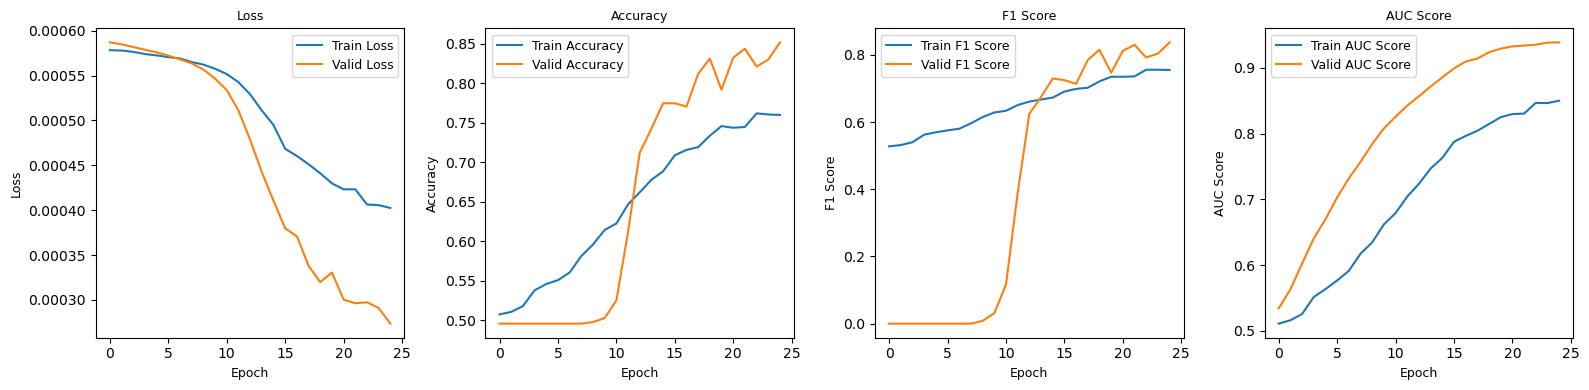

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB7Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 0.000002
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [21]:
model = EfficientB7Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1181
           1       0.87      0.85      0.86      1203

    accuracy                           0.86      2384
   macro avg       0.86      0.86      0.86      2384
weighted avg       0.86      0.86      0.86      2384

Skin tone 1: Accuracy 0.8618307426597582
Skin tone 3: Accuracy 0.9030612244897959
Skin tone 0: Accuracy 0.8479338842975207
Skin tone 2: Accuracy 0.8382352941176471


In [22]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1171
           1       0.88      0.86      0.87      1177

    accuracy                           0.87      2348
   macro avg       0.87      0.87      0.87      2348
weighted avg       0.87      0.87      0.87      2348

Skin tone 1: Accuracy 0.8835125448028673
Skin tone 3: Accuracy 0.9008695652173913
Skin tone 2: Accuracy 0.8267326732673267
Skin tone 0: Accuracy 0.8719211822660099


# Resnet

In [23]:
model_name = "resnet"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/resnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.4954 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.5066
Validation Accuracy: 0.5042 | Loss: 0.0005 | F1: 0.0452 | AUC: 0.7395
Validation Accuracy: 0.7370 | Loss: 0.0004 | F1: 0.6793 | AUC: 0.8426
Validation Accuracy: 0.7416 | Loss: 0.0003 | F1: 0.6771 | AUC: 0.8829
Validation Accuracy: 0.7710 | Loss: 0.0003 | F1: 0.7275 | AUC: 0.8962
Validation Accuracy: 0.7869 | Loss: 0.0003 | F1: 0.7457 | AUC: 0.9143
Validation Accuracy: 0.8247 | Loss: 0.0003 | F1: 0.8077 | AUC: 0.9209
Validation Accuracy: 0.7999 | Loss: 0.0003 | F1: 0.7637 | AUC: 0.9259
Validation Accuracy: 0.8372 | Loss: 0.0003 | F1: 0.8307 | AUC: 0.9184
Validation Accuracy: 0.8591 | Loss: 0.0002 | F1: 0.8504 | AUC: 0.9408
Validation Accuracy: 0.8448 | Loss: 0.0002 | F1: 0.8276 | AUC: 0.9500
Validation Accuracy: 0.8628 | Loss: 0.0002 | F1: 0.8560 | AUC: 0.9476
Validation Accuracy: 0.8645 | Loss: 0.0002 | F1: 0.8672 | AUC: 0.9454
Validation Accuracy: 0.8444 | Loss: 0.0002 | F1: 0.8266 | AUC: 0.9532
Validation Accuracy:

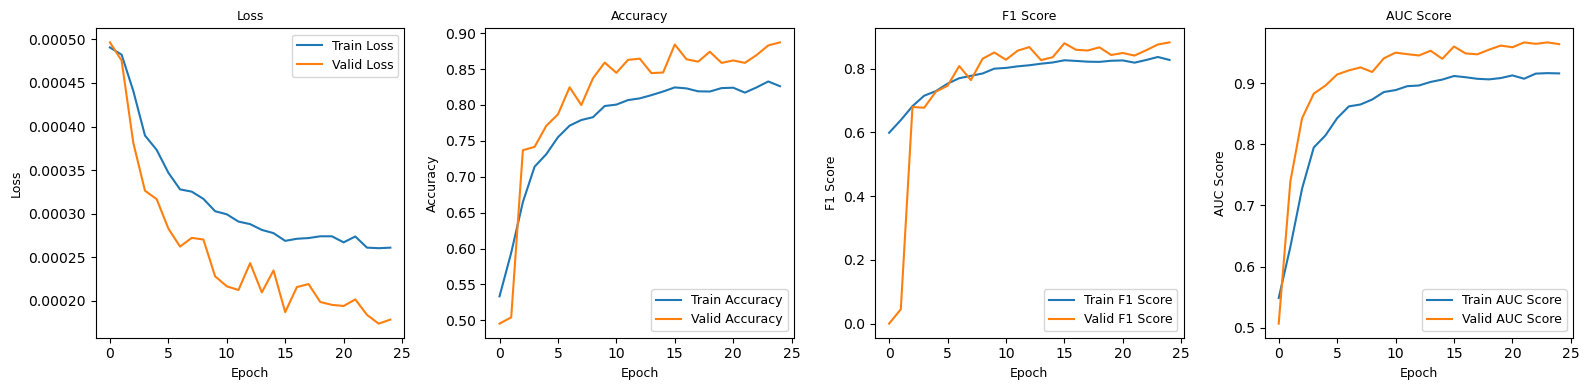

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [25]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1181
           1       0.92      0.85      0.89      1203

    accuracy                           0.89      2384
   macro avg       0.89      0.89      0.89      2384
weighted avg       0.89      0.89      0.89      2384

Skin tone 1: Accuracy 0.9050086355785838
Skin tone 3: Accuracy 0.9268707482993197
Skin tone 0: Accuracy 0.8876033057851239
Skin tone 2: Accuracy 0.8398692810457516


In [26]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1171
           1       0.91      0.86      0.89      1177

    accuracy                           0.89      2348
   macro avg       0.89      0.89      0.89      2348
weighted avg       0.89      0.89      0.89      2348

Skin tone 1: Accuracy 0.9157706093189965
Skin tone 3: Accuracy 0.9095652173913044
Skin tone 2: Accuracy 0.8481848184818482
Skin tone 0: Accuracy 0.8883415435139573


# VGG

In [27]:
model_name = "vgg"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/vgg/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.5411 | Loss: 0.0006 | F1: 0.1991 | AUC: 0.7223
Validation Accuracy: 0.7143 | Loss: 0.0006 | F1: 0.6917 | AUC: 0.7681
Validation Accuracy: 0.7215 | Loss: 0.0005 | F1: 0.6990 | AUC: 0.7867
Validation Accuracy: 0.7492 | Loss: 0.0005 | F1: 0.7409 | AUC: 0.8086
Validation Accuracy: 0.7534 | Loss: 0.0005 | F1: 0.7619 | AUC: 0.8286
Validation Accuracy: 0.7592 | Loss: 0.0005 | F1: 0.7674 | AUC: 0.8424
Validation Accuracy: 0.7697 | Loss: 0.0004 | F1: 0.7685 | AUC: 0.8546
Validation Accuracy: 0.7886 | Loss: 0.0004 | F1: 0.7884 | AUC: 0.8686
Validation Accuracy: 0.7924 | Loss: 0.0004 | F1: 0.7684 | AUC: 0.8800
Validation Accuracy: 0.8079 | Loss: 0.0004 | F1: 0.8036 | AUC: 0.8903
Validation Accuracy: 0.8108 | Loss: 0.0004 | F1: 0.7980 | AUC: 0.8954
Validation Accuracy: 0.8234 | Loss: 0.0004 | F1: 0.8241 | AUC: 0.9046
Validation Accuracy: 0.8192 | Loss: 0.0003 | F1: 0.8045 | AUC: 0.9069
Validation Accuracy: 0.8234 | Loss: 0.0003 | F1: 0.8089 | AUC: 0.9106
Validation Accuracy:

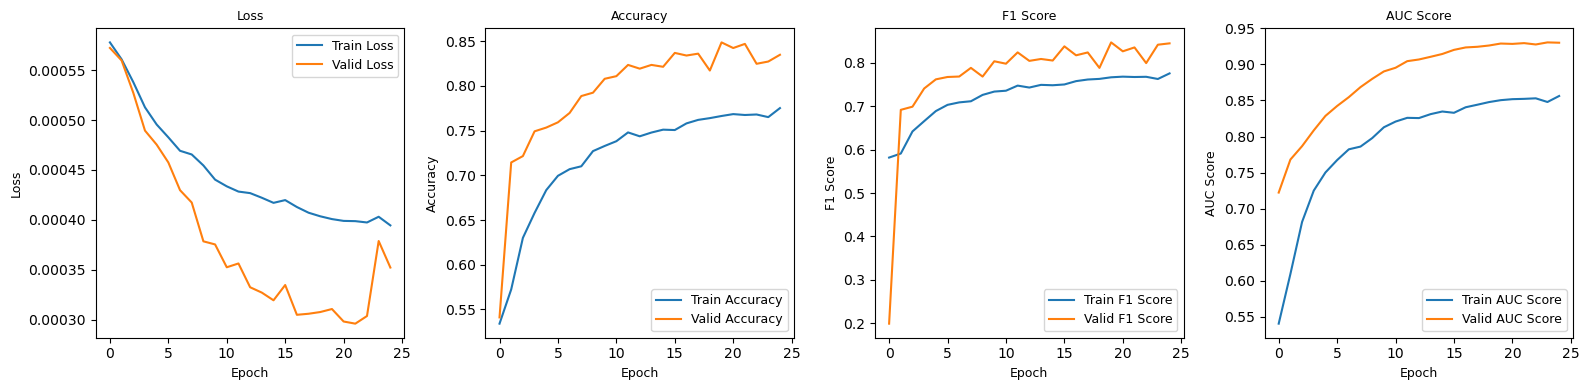

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 0.000001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [29]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1181
           1       0.85      0.84      0.85      1203

    accuracy                           0.85      2384
   macro avg       0.85      0.85      0.85      2384
weighted avg       0.85      0.85      0.85      2384

Skin tone 1: Accuracy 0.853195164075993
Skin tone 3: Accuracy 0.891156462585034
Skin tone 0: Accuracy 0.8314049586776859
Skin tone 2: Accuracy 0.815359477124183


In [30]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1171
           1       0.84      0.86      0.85      1177

    accuracy                           0.85      2348
   macro avg       0.85      0.85      0.85      2348
weighted avg       0.85      0.85      0.85      2348

Skin tone 1: Accuracy 0.8763440860215054
Skin tone 3: Accuracy 0.8730434782608696
Skin tone 2: Accuracy 0.8102310231023102
Skin tone 0: Accuracy 0.8522167487684729
